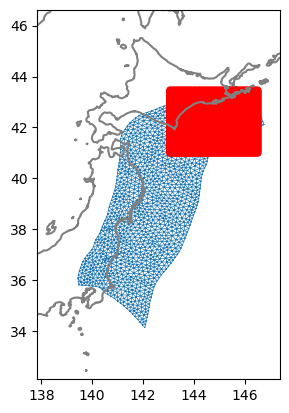

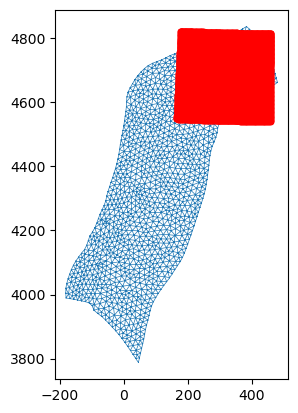

In [28]:
# Import libraries
import pandas as pd
import numpy as np # Numerical analysis
import gmsh # Creation of fault models
import meshio # Interaction between fault model files and Python
import matplotlib.pyplot as plt # Visualize 
from pyproj import Proj
import pyproj
import utm 


# Read in coastline file
coast = pd.read_csv("coastline.csv")

# Read in source fault
filename = "japan.msh"
mesh = dict()
meshobj = meshio.read(filename)
mesh["file_name"] = filename
mesh["points"] = meshobj.points
mesh["verts"] = meshio.CellBlock("triangle", meshobj.get_cells_type("triangle")).data



# Set up grid where vertical displacement will be calculated
xs = np.linspace(143, 146.5, 200)
ys = np.linspace(41, 43.5, 200)
obsx, obsy = np.meshgrid(xs, ys)
pts = np.array([obsx, obsy, 0 * obsy]).reshape((3, -1)).T.copy()

# Convert the fault and grid coordinates to Cartesian

# Set up transformation
utmzone=int(32700-(np.sign(np.mean(ys))+1)/2 * 100+np.floor((180+np.mean(xs))/6) + 1)
target_crs = 'epsg:'+str(utmzone) # Coordinate system of the file
source_crs = 'epsg:4326' # Global lat-lon coordinate system
latlon_to_utm = pyproj.Transformer.from_crs(source_crs, target_crs)

# Convert coordinates
faultxy = np.array(latlon_to_utm.transform(mesh["points"][:, 1], mesh["points"][:, 0])).T/1e3
gridxy = np.array(latlon_to_utm.transform(pts[:, 1], pts[:, 0])).T/1e3 


# Plot the source fault

# Setting up axis limits
xmin = np.mean(mesh["points"][:, 0]) - 3*np.std(mesh["points"][:, 0])
xmax = np.mean(mesh["points"][:, 0]) + 3*np.std(mesh["points"][:, 0])
ymin = np.mean(mesh["points"][:, 1]) - 3*np.std(mesh["points"][:, 1])
ymax = np.mean(mesh["points"][:, 1]) + 3*np.std(mesh["points"][:, 1])
fig, ax = plt.subplots()
# Draw the fault
ax.triplot(mesh["points"][:, 0], mesh["points"][:, 1], mesh["verts"], linewidth=0.5)
# Add grid points
ax.plot(pts[:, 0], pts[:, 1], '.r')
# Add coastline
ax.plot(coast.lon, coast.lat, color="gray")
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), aspect='equal')
plt.show()

fig, ax = plt.subplots()
ax.triplot(faultxy[:,0], faultxy[:, 1], mesh["verts"], linewidth=0.5)
ax.plot(gridxy[:, 0], gridxy[:, 1], '.r')
ax.set(aspect="equal")
plt.show()






In [ ]:
# Calculate the mathematical relationship between unit fault slip and displacement


In [ ]:
# Set up fault slip distribution 
slip 


# Calculate displacement at grid points that arises from fault slip
disp = slip_to_disp@slip

# Visualize the displacement pattern 

# Read in coastline file
